In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import seaborn as sns; sns.set()  # for plot styling
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy
import seaborn as sns
pd.options.display.max_columns = 999

In [2]:
user_counts = pd.read_csv("../profiles/question_counts.csv", encoding='latin1')

In [3]:
user_counts.columns

Index(['Id', 'flex', 'actionscript-3', 'svn', 'sql', 'asp.net', 'algorithm',
       'colors', 'c#', '.net',
       ...
       'meteor', 'laravel', 'firebase', 'parse.com', 'typescript', 'docker',
       'apache-spark', 'reactjs', 'spring-boot', 'ionic-framework'],
      dtype='object', length=363)

In [ ]:
fig=plt.figure(figsize=(18, 16), dpi= 100)
# clustering for k = 5 to k = 85 incerementing by 5
ks = range(5,85,5)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(user_counts.values[:, 1:])
    scores.append(-model.score(user_counts.values[:, 1:]))

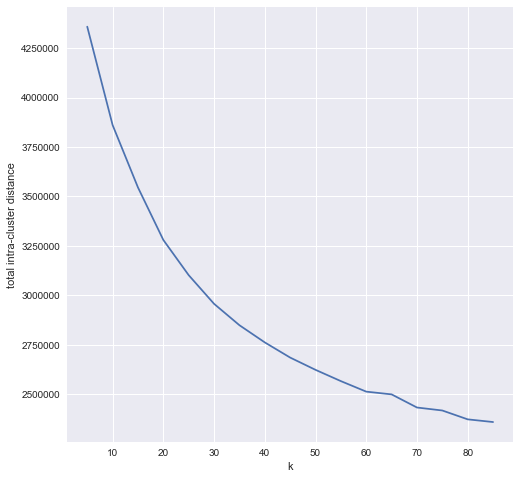

In [30]:
fig = plt.figure(figsize = (8,8))
plt.plot(np.arange(5,86,5), scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

In [83]:
def plot_corr_seaborn(df_corr,threshold,size=200):
    mask = np.zeros_like(df_corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        fig, ax = plt.subplots()
        # the size of A4 paper
        fig.set_size_inches(100, 100)
        ax = sns.heatmap(df_corr, mask=mask, vmax=.3, square=True)
    plt.savefig('correlations.jpg')
    print("Saved correlations graph")

def plot_cov_seaborn(df_cov,threshold,size=200):
    mask = np.zeros_like(df_cov)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        fig, ax = plt.subplots()
        # the size of A4 paper
        fig.set_size_inches(100, 100)
        ax = sns.heatmap(df_cov, mask=mask, vmax=.3, square=True)
    plt.savefig('covariations.jpg')
    print("Saved covariations graph")

In [12]:
correlation_matrix = user_counts.drop(["Id"],axis=1,inplace=False).corr()
corvariation_matrix = user_counts.drop(["Id"],axis=1,inplace=False).cov()

Saved covariations graph


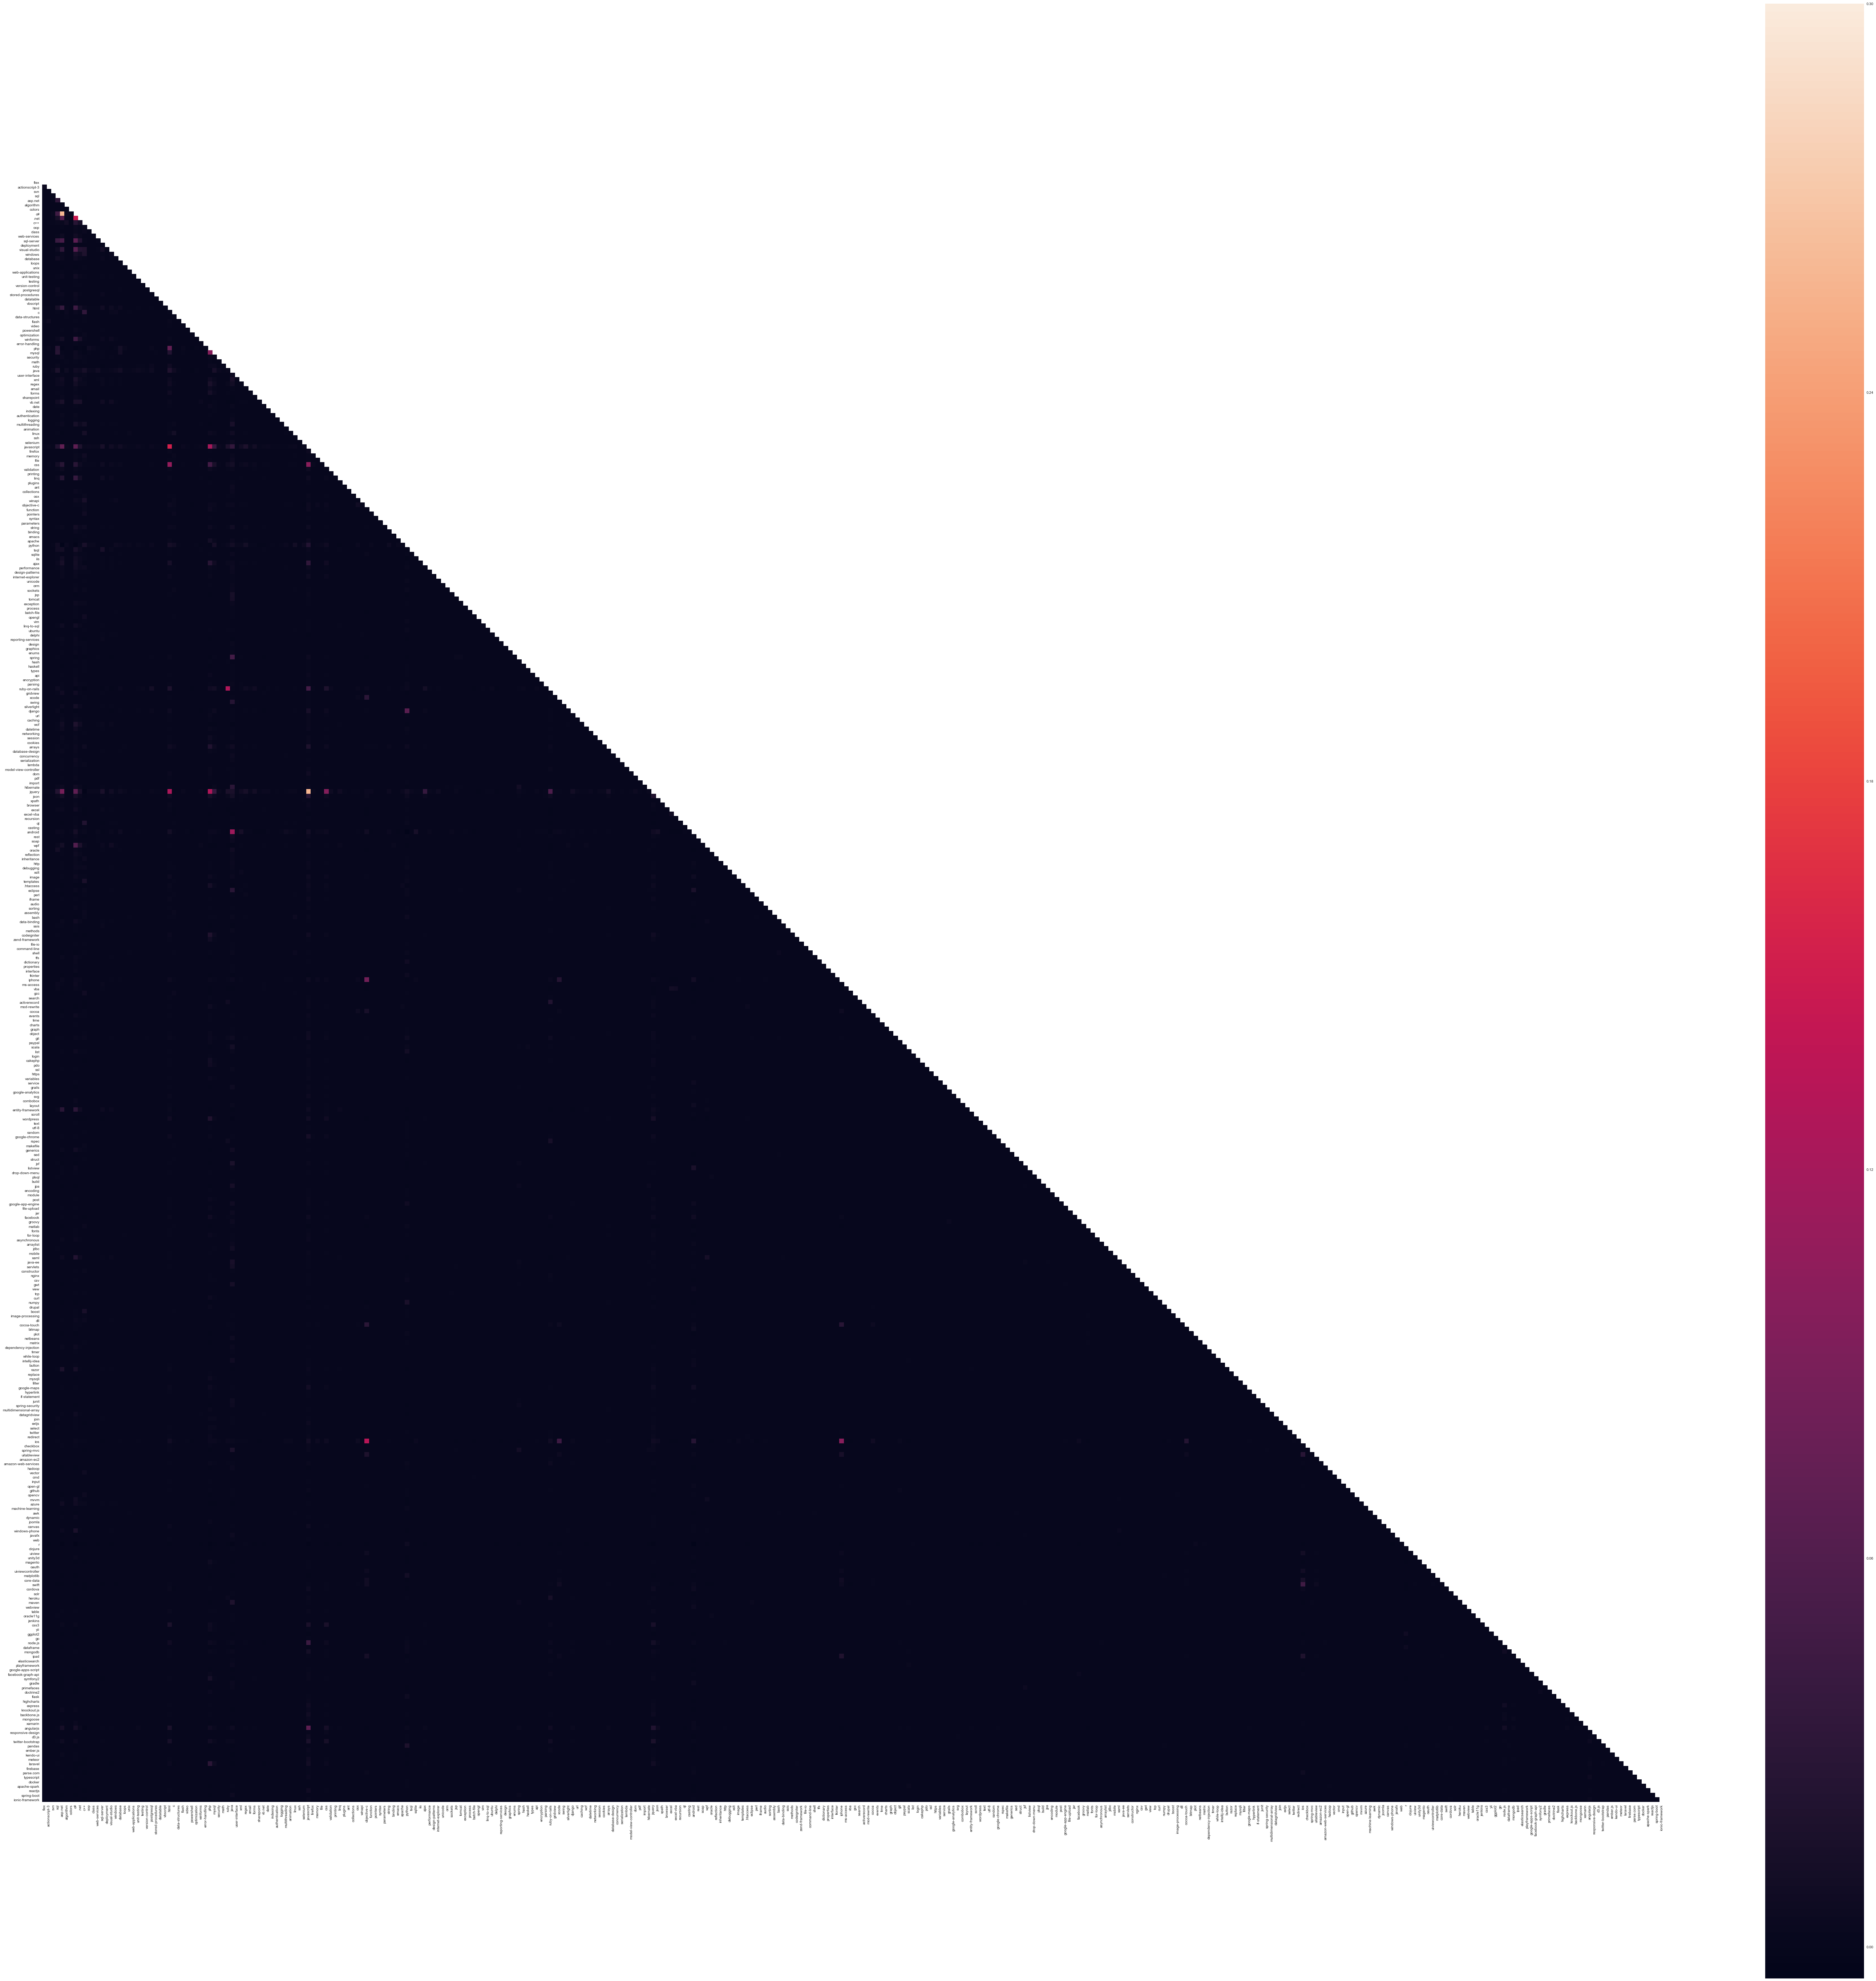

In [84]:
plot_cov_seaborn(corvariation_matrix,0.1)

Saved correlations graph


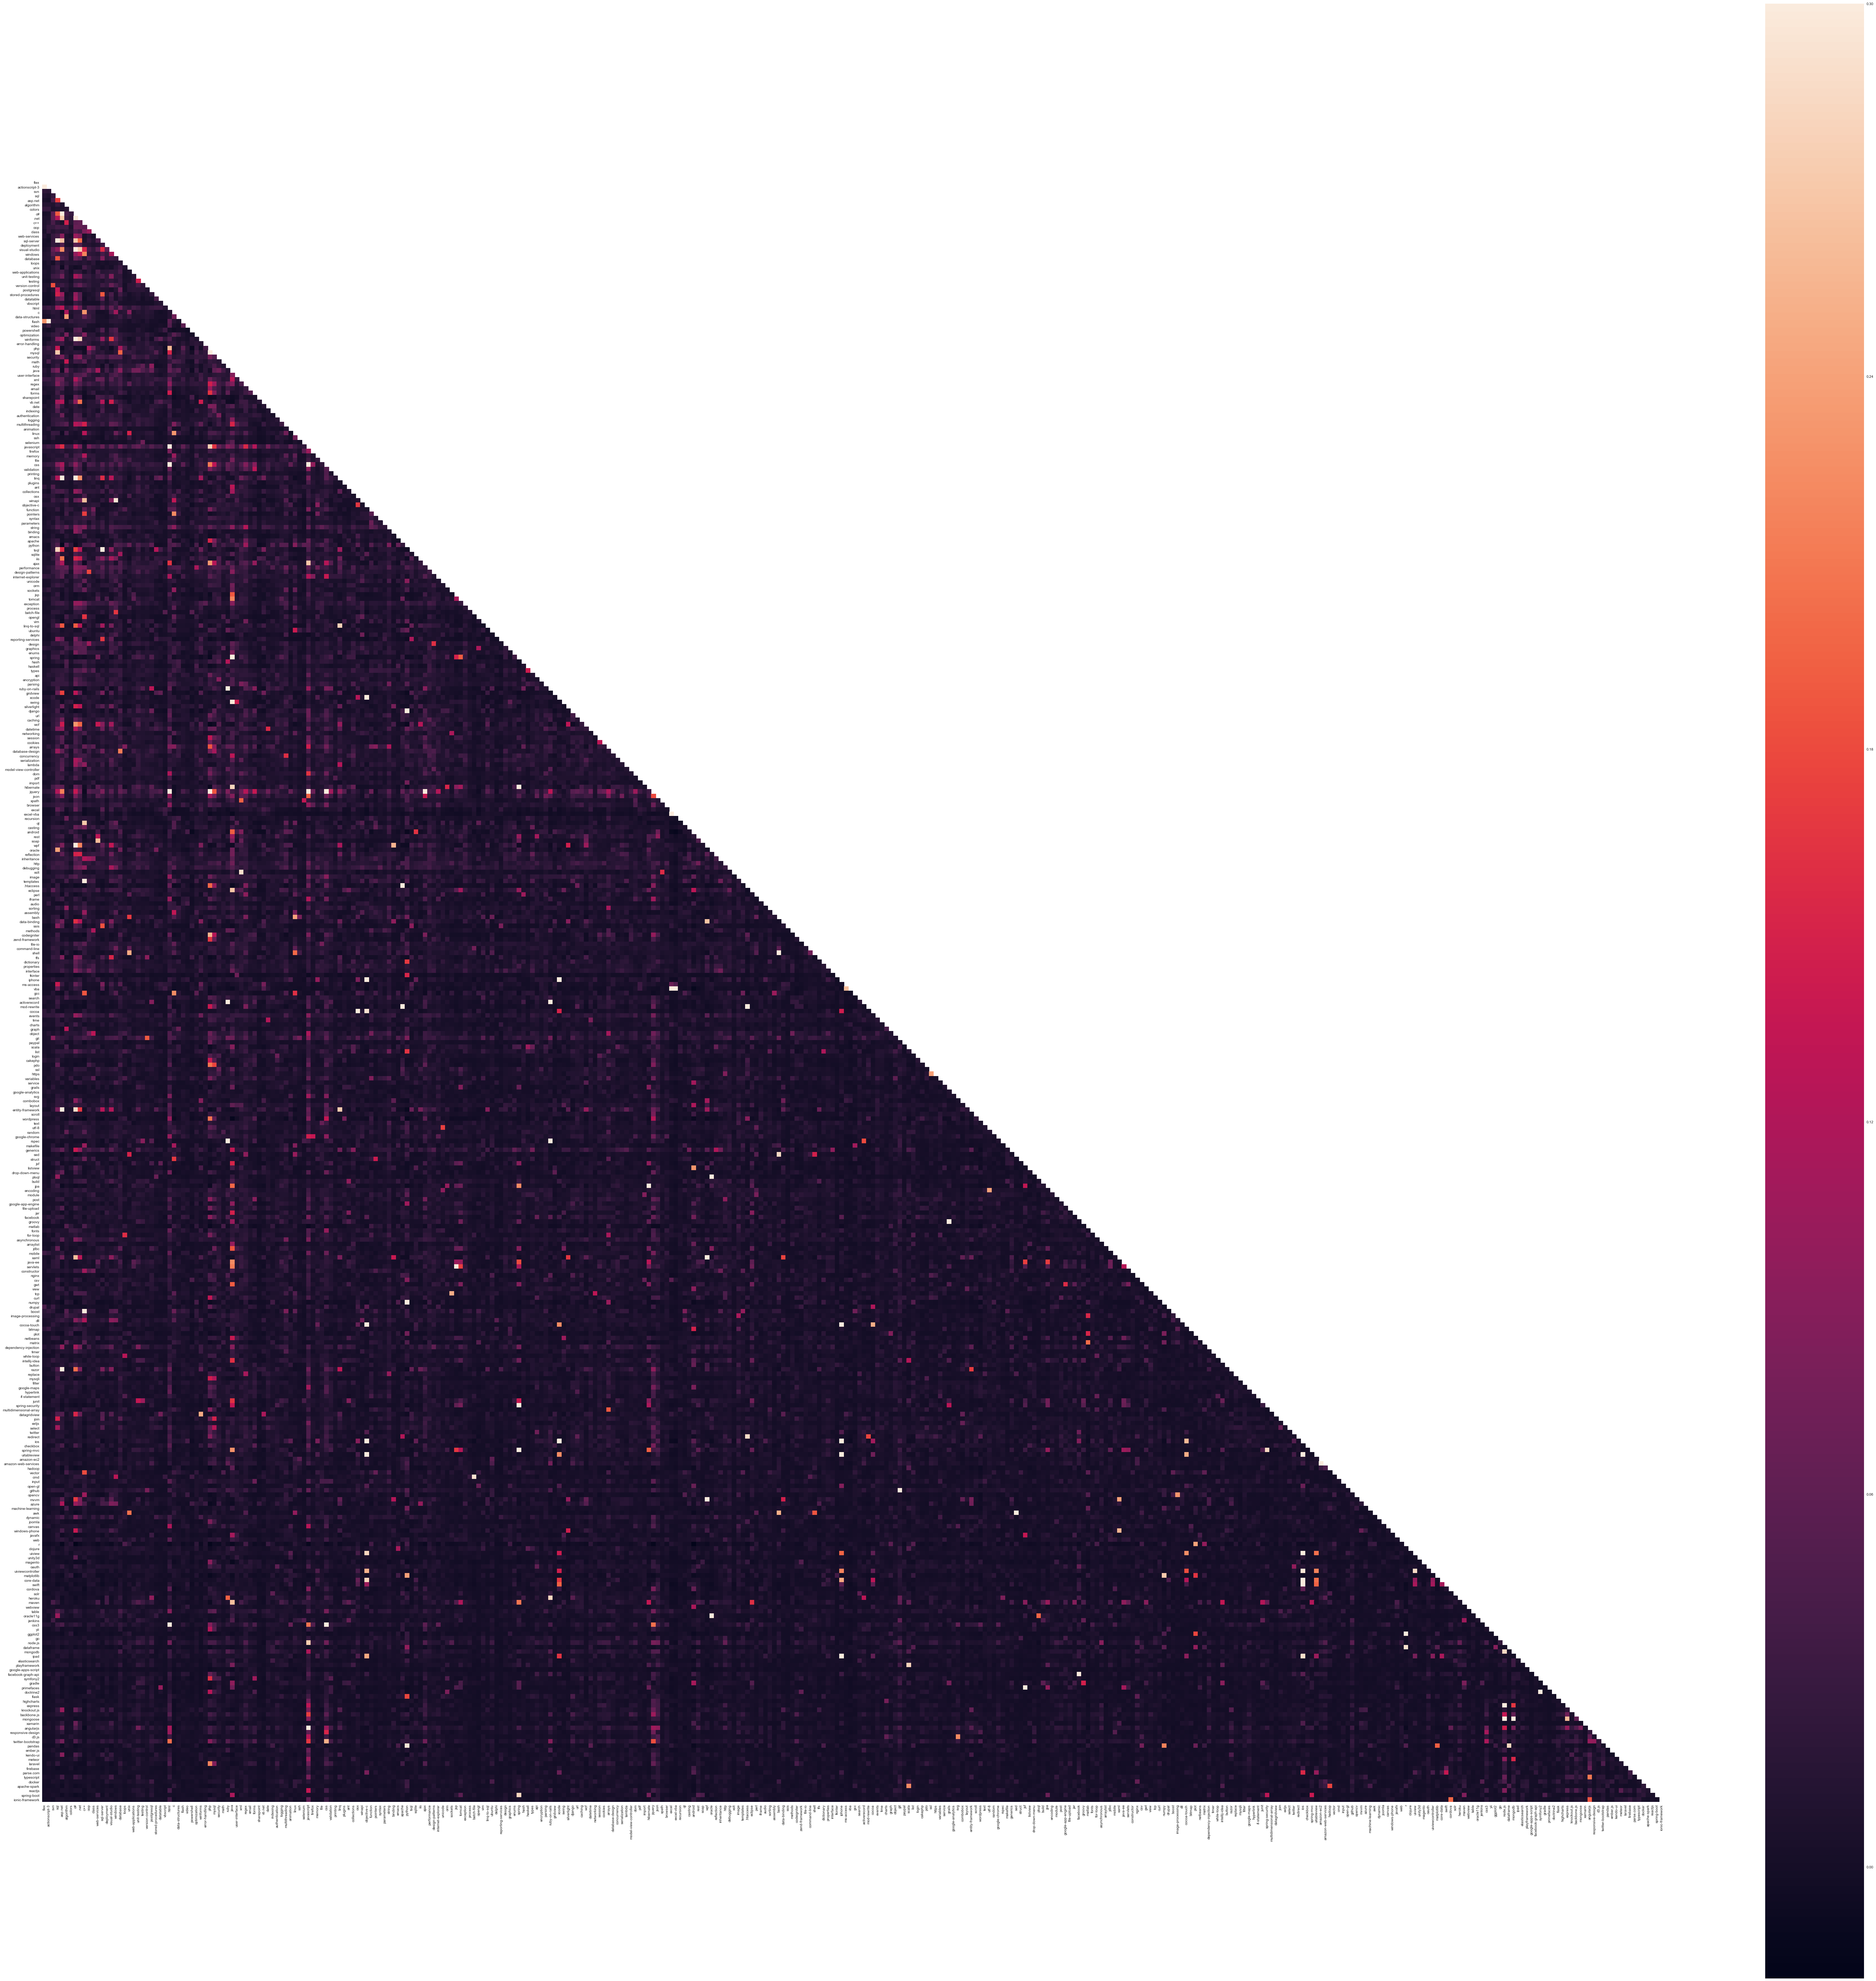

In [80]:
plot_corr_seaborn(correlation_matrix,0.1)

In [40]:
correlation_matrix[correlation_matrix['python'] > 0.1]['python']

regex                0.107286
python               1.000000
django               0.359097
dictionary           0.168394
tkinter              0.153220
list                 0.164919
google-app-engine    0.106857
numpy                0.301462
matplotlib           0.238616
flask                0.178206
pandas               0.295592
Name: python, dtype: float64

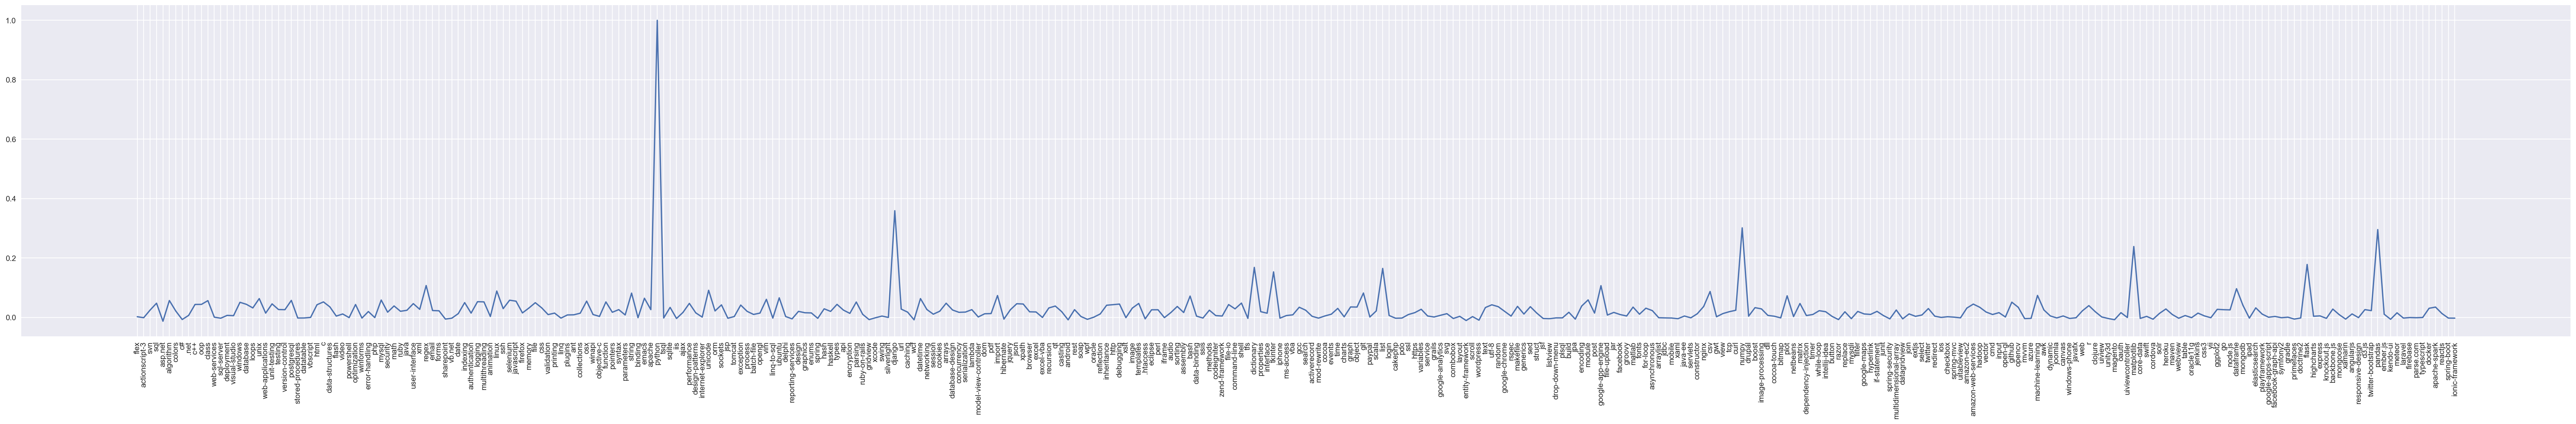

In [60]:
labels = correlation_matrix.columns.values.tolist()
fig = plt.figure(figsize = (60,8),dpi=160)
plt.plot(range(362), correlation_matrix['python'])
plt.xticks(range(362), labels, rotation = 90);

### PCA

In [3]:
user_counts = pd.read_csv("../profiles/question_counts.csv", encoding='latin1')

In [4]:
user_counts.head()

,Id,flex,actionscript-3,svn,sql,asp.net,algorithm,colors,c#,.net,c++,oop,class,web-services,sql-server,deployment,visual-studio,windows,database,loops,unix,web-applications,unit-testing,testing,version-control,postgresql,stored-procedures,datatable,vbscript,html,c,data-structures,flash,video,powershell,optimization,winforms,error-handling,php,mysql,security,math,ruby,java,user-interface,xml,regex,email,forms,sharepoint,vb.net,date,indexing,authentication,logging,multithreading,animation,linux,ssh,selenium,javascript,firefox,memory,file,css,validation,printing,linq,plugins,ant,collections,osx,winapi,objective-c,function,pointers,syntax,parameters,string,binding,emacs,apache,python,tsql,sqlite,iis,ajax,performance,design-patterns,internet-explorer,unicode,orm,sockets,jsp,tomcat,exception,process,batch-file,opengl,vim,linq-to-sql,ubuntu,delphi,reporting-services,design,graphics,enums,spring,hash,haskell,types,api,encryption,parsing,ruby-on-rails,gridview,xcode,swing,silverlight,django,url,caching,wcf,datetime,networking,session,cookies,arrays,database-design,concurrency,serialization,lambda,model-view-controller,dom,pdf,import,hibernate,jquery,json,xpath,browser,excel,excel-vba,recursion,qt,casting,android,rest,soap,wpf,oracle,reflection,inheritance,http,debugging,xslt,image,templates,.htaccess,eclipse,perl,iframe,audio,sorting,assembly,bash,data-binding,ssis,methods,codeigniter,zend-framework,file-io,command-line,shell,tfs,dictionary,properties,interface,tkinter,iphone,ms-access,vba,gcc,search,activerecord,mod-rewrite,cocoa,events,time,charts,graph,object,git,paypal,scala,list,login,cakephp,pdo,ssl,https,variables,service,grails,google-analytics,svg,combobox,layout,entity-framework,scroll,wordpress,text,utf-8,random,google-chrome,rspec,makefile,generics,sed,struct,jsf,listview,drop-down-menu,plsql,build,jpa,encoding,module,post,google-app-engine,file-upload,jar,facebook,groovy,matlab,fonts,for-loop,asynchronous,arraylist,jdbc,mobile,xaml,java-ee,servlets,constructor,nginx,csv,gwt,view,tcp,curl,numpy,drupal,boost,image-processing,dll,cocoa-touch,bitmap,plot,netbeans,matrix,dependency-injection,timer,while-loop,intellij-idea,button,razor,replace,mysqli,filter,google-maps,hyperlink,if-statement,junit,spring-security,multidimensional-array,datagridview,join,extjs,select,twitter,redirect,ios,checkbox,spring-mvc,uitableview,amazon-ec2,amazon-web-services,hadoop,vector,cmd,input,open-gl,github,opencv,mvvm,azure,machine-learning,awk,dynamic,joomla,canvas,windows-phone,javafx,web,r,clojure,uiview,unity3d,magento,oauth,uiviewcontroller,matplotlib,core-data,swift,cordova,solr,heroku,maven,webview,table,oracle11g,jenkins,css3,yii,ggplot2,go,node.js,dataframe,mongodb,ipad,elasticsearch,playframework,google-apps-script,facebook-graph-api,symfony2,gradle,primefaces,doctrine2,flask,highcharts,express,knockout.js,backbone.js,mongoose,xamarin,angularjs,responsive-design,d3.js,twitter-bootstrap,pandas,ember.js,kendo-ui,meteor,laravel,firebase,parse.com,typescript,docker,apache-spark,reactjs,spring-boot,ionic-framework
0,26.0,3.0,1.0,0.0,0.0,4.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [4]:
user_questions_normalized = StandardScaler().fit_transform(user_counts.drop(["Id"],axis=1,inplace=False))

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(user_questions_normalized)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [6]:
targeted_users = user_counts[(user_counts['ios'] > 10)].index.tolist()
targeted_users_index = [user_counts.index.get_loc(targeted_user) for targeted_user in targeted_users]
targeted_plot_users = principalDf[principalDf.index.isin(targeted_users_index)]

In [11]:
targeted_users_2 = user_counts[(user_counts['android'] > 10)].index.tolist()
targeted_users_2_index = [user_counts.index.get_loc(targeted_user) for targeted_user in targeted_users_2]
targeted_plot_users_2 = principalDf[principalDf.index.isin(targeted_users_2_index)]

In [8]:
targeted_users_3 = user_counts[(user_counts['java'] > 10)].index.tolist()
targeted_users_3_index = [user_counts.index.get_loc(targeted_user) for targeted_user in targeted_users_3]
targeted_plot_users_3 = principalDf[principalDf.index.isin(targeted_users_3_index)]

In [9]:
targeted_users_4 = user_counts[(user_counts['c#'] > 10)].index.tolist()
targeted_users_4_index = [user_counts.index.get_loc(targeted_user) for targeted_user in targeted_users_4]
targeted_plot_users_4 = principalDf[principalDf.index.isin(targeted_users_4_index)]

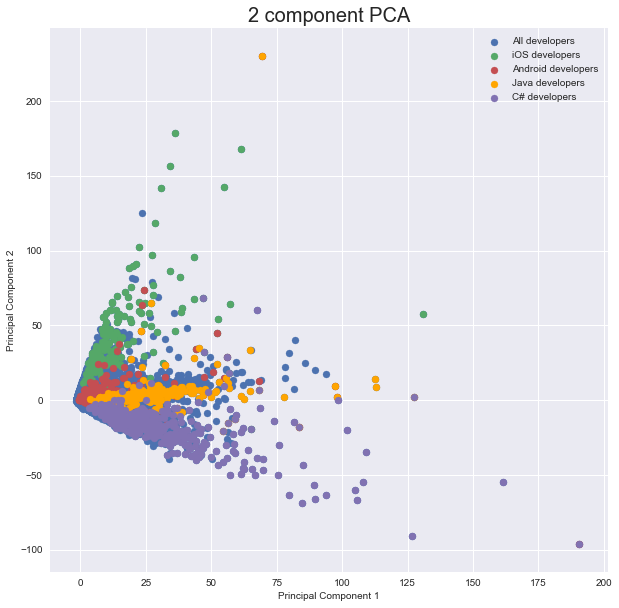

In [12]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
ax.scatter(targeted_plot_users['principal component 1'], targeted_plot_users['principal component 2'])
ax.scatter(targeted_plot_users_2['principal component 1'], targeted_plot_users_2['principal component 2'])
ax.scatter(targeted_plot_users_3['principal component 1'], targeted_plot_users_3['principal component 2'],c='orange')
ax.scatter(targeted_plot_users_4['principal component 1'], targeted_plot_users_4['principal component 2'])
ax.legend(['All developers', 'iOS developers', 'Android developers', 'Java developers', 'C# developers'])
plt.show()

In [15]:
targeted_users_5 = user_counts[(user_counts['php'] > 10)].index.tolist()
targeted_users_5_index = [user_counts.index.get_loc(targeted_user) for targeted_user in targeted_users_5]
targeted_plot_users_5 = principalDf[principalDf.index.isin(targeted_users_5_index)]

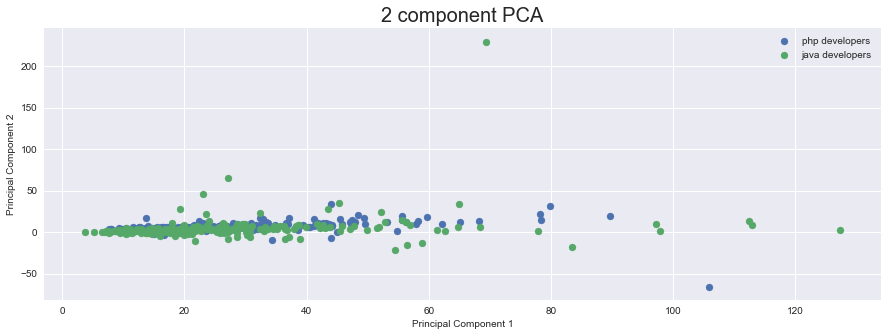

In [22]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(targeted_plot_users_5['principal component 1'], targeted_plot_users_5['principal component 2'])
ax.scatter(targeted_plot_users_3['principal component 1'], targeted_plot_users_3['principal component 2'])
ax.legend(['php developers','java developers'])
plt.show()

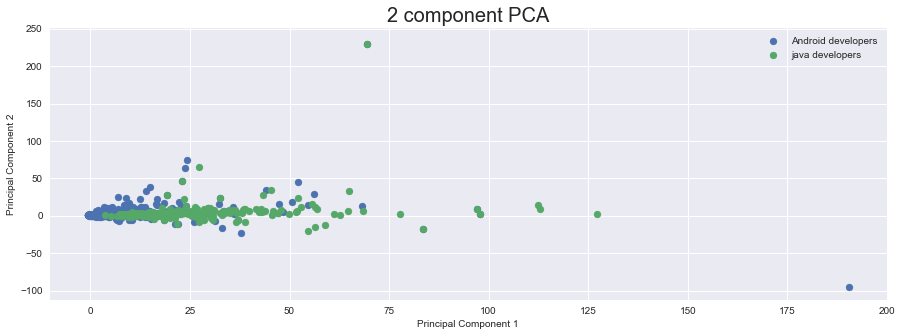

In [23]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(targeted_plot_users_2['principal component 1'], targeted_plot_users_2['principal component 2'])
ax.scatter(targeted_plot_users_3['principal component 1'], targeted_plot_users_3['principal component 2'])
ax.legend(['Android developers','java developers'])
plt.show()

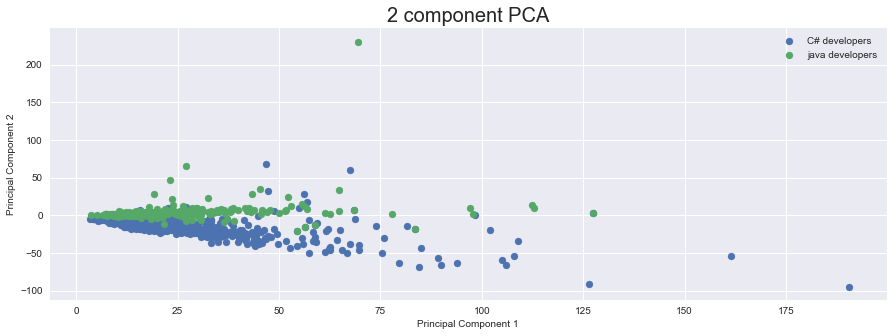

In [24]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(targeted_plot_users_4['principal component 1'], targeted_plot_users_4['principal component 2'])
ax.scatter(targeted_plot_users_3['principal component 1'], targeted_plot_users_3['principal component 2'])
ax.legend(['C# developers','java developers'])
plt.show()

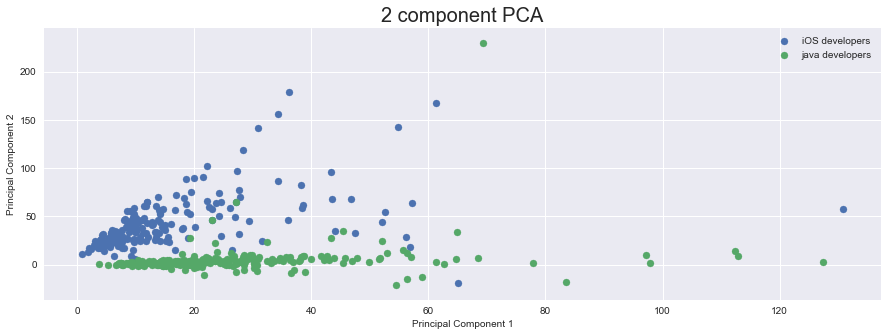

In [25]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(targeted_plot_users['principal component 1'], targeted_plot_users['principal component 2'])
ax.scatter(targeted_plot_users_3['principal component 1'], targeted_plot_users_3['principal component 2'])
ax.legend(['iOS developers','java developers'])
plt.show()

### Using our clusters

In [5]:
user_counts = pd.read_csv("../profiles/question_counts.csv", encoding='latin1')

In [6]:
kmeans = KMeans(n_clusters=35, init='k-means++').fit(user_counts.values[:, 1:])

In [7]:
center_points = [[round(i,2) for i in center] for center in kmeans.cluster_centers_]
centers = pd.DataFrame(data=center_points, columns = user_counts.columns[1:])
centers.insert(0, 'Id', np.arange(35))
centers.head()

,Id,flex,actionscript-3,svn,sql,asp.net,algorithm,colors,c#,.net,c++,oop,class,web-services,sql-server,deployment,visual-studio,windows,database,loops,unix,web-applications,unit-testing,testing,version-control,postgresql,stored-procedures,datatable,vbscript,html,c,data-structures,flash,video,powershell,optimization,winforms,error-handling,php,mysql,security,math,ruby,java,user-interface,xml,regex,email,forms,sharepoint,vb.net,date,indexing,authentication,logging,multithreading,animation,linux,ssh,selenium,javascript,firefox,memory,file,css,validation,printing,linq,plugins,ant,collections,osx,winapi,objective-c,function,pointers,syntax,parameters,string,binding,emacs,apache,python,tsql,sqlite,iis,ajax,performance,design-patterns,internet-explorer,unicode,orm,sockets,jsp,tomcat,exception,process,batch-file,opengl,vim,linq-to-sql,ubuntu,delphi,reporting-services,design,graphics,enums,spring,hash,haskell,types,api,encryption,parsing,ruby-on-rails,gridview,xcode,swing,silverlight,django,url,caching,wcf,datetime,networking,session,cookies,arrays,database-design,concurrency,serialization,lambda,model-view-controller,dom,pdf,import,hibernate,jquery,json,xpath,browser,excel,excel-vba,recursion,qt,casting,android,rest,soap,wpf,oracle,reflection,inheritance,http,debugging,xslt,image,templates,.htaccess,eclipse,perl,iframe,audio,sorting,assembly,bash,data-binding,ssis,methods,codeigniter,zend-framework,file-io,command-line,shell,tfs,dictionary,properties,interface,tkinter,iphone,ms-access,vba,gcc,search,activerecord,mod-rewrite,cocoa,events,time,charts,graph,object,git,paypal,scala,list,login,cakephp,pdo,ssl,https,variables,service,grails,google-analytics,svg,combobox,layout,entity-framework,scroll,wordpress,text,utf-8,random,google-chrome,rspec,makefile,generics,sed,struct,jsf,listview,drop-down-menu,plsql,build,jpa,encoding,module,post,google-app-engine,file-upload,jar,facebook,groovy,matlab,fonts,for-loop,asynchronous,arraylist,jdbc,mobile,xaml,java-ee,servlets,constructor,nginx,csv,gwt,view,tcp,curl,numpy,drupal,boost,image-processing,dll,cocoa-touch,bitmap,plot,netbeans,matrix,dependency-injection,timer,while-loop,intellij-idea,button,razor,replace,mysqli,filter,google-maps,hyperlink,if-statement,junit,spring-security,multidimensional-array,datagridview,join,extjs,select,twitter,redirect,ios,checkbox,spring-mvc,uitableview,amazon-ec2,amazon-web-services,hadoop,vector,cmd,input,open-gl,github,opencv,mvvm,azure,machine-learning,awk,dynamic,joomla,canvas,windows-phone,javafx,web,r,clojure,uiview,unity3d,magento,oauth,uiviewcontroller,matplotlib,core-data,swift,cordova,solr,heroku,maven,webview,table,oracle11g,jenkins,css3,yii,ggplot2,go,node.js,dataframe,mongodb,ipad,elasticsearch,playframework,google-apps-script,facebook-graph-api,symfony2,gradle,primefaces,doctrine2,flask,highcharts,express,knockout.js,backbone.js,mongoose,xamarin,angularjs,responsive-design,d3.js,twitter-bootstrap,pandas,ember.js,kendo-ui,meteor,laravel,firebase,parse.com,typescript,docker,apache-spark,reactjs,spring-boot,ionic-framework
0,0,0.03,0.06,0.01,0.24,0.38,0.08,0.02,0.54,0.13,0.25,0.06,0.05,0.03,0.12,0.02,0.08,0.07,0.15,0.06,0.04,0.05,0.17,0.06,0.02,0.09,0.01,0.01,0.01,2.56,0.09,0.02,0.06,0.02,0.04,0.03,0.00,0.03,0.97,0.39,0.05,0.03,0.22,0.77,0.04,0.15,0.39,0.05,0.12,0.01,0.03,0.08,0.01,0.04,0.03,0.05,0.07,0.11,0.02,0.09,10.41,0.09,0.06,0.03,1.71,0.07,0.01,0.06,0.03,0.01,0.01,0.10,0.06,0.11,0.09,0.01,0.04,0.02,0.14,0.01,0.02,0.10,0.56,0.02,0.03,0.03,0.38,0.10,0.04,0.08,0.02,0.01,0.06,0.05,0.03,0.01,0.02,0.02,0.02,0.04,0.01,0.06,0.00,0.01,0.03,-0.0,0.01,0.09,0.03,0.07,0.04,0.07,0.03,0.03,0.38,0.01,0.05,0.01,0.01,0.17,0.07,0.05,0.02,0.06,0.01,0.07,0.06,0.38,0.01,0.01,0.02,0.01,0.07,0.21,0.01,0.01,0.05,3.13,0.49,0.01,0.09,0.04,0.01,0.03,0.01,0.01,0.62,0.11,0.01,0.02,0.02,0.01,0.03,0.09,0.09,0.03,0.11,0.07,0.05,0.06,0.04,0.08,0.01,0.05,0.01,0.09,0.02,0.00,0.02,0.07,0.01,0.02,0.03,0.06,0.01,0.03,0.02,0.01,-0.0,0.11,0.02,0.02,0.02,0.02,0.01,0.02,0.01,0.08,0.01,0.

In [10]:
centers_copy = pd.DataFrame(centers)

In [36]:
centers_copy[centers_copy['Id'] == 13].sort_values(by=13, ascending=False, axis=1)

,ruby-on-rails,Id,ruby,javascript,jquery,html,css,activerecord,rspec,php,heroku,postgresql,mysql,ajax,python,sql,angularjs,ios,forms,twitter-bootstrap,java,android,git,regex,json,objective-c,arrays,database,mongodb,facebook,node.js,amazon-web-services,cocoa-touch,iphone,validation,model-view-controller,osx,css3,nginx,api,hash,spring,ubuntu,linux,xml,testing,scala,string,ember.js,email,reactjs,cakephp,facebook-graph-api,c#,twitter,date,authentication,hibernate,windows,backbone.js,wordpress,xcode,caching,vim,github,security,bash,unit-testing,datetime,http,django,apache,select,selenium,redirect,methods,swift,google-maps,oop,google-chrome,time,cocoa,rest,eclipse,performance,image,c,go,function,junit,class,parsing,spring-mvc,url,sqlite,amazon-ec2,session,cookies,database-design,pandas,search,shell,codeigniter,multithreading,sorting,iframe,oauth,debugging,deployment,highcharts,elasticsearch,view,file-upload,post,solr,emacs,curl,csv,templates,logging,firefox,paypal,.net,meteor,flash,sql-server,replace,flex,r,drop-down-menu,numpy,uiview,join,perl,hyperlink,if-statement,uiviewcontroller,symfony2,object,windows-phone,maven,express,jpa,checkbox,layout,variables,encoding,ssl,flask,fonts,mobile,input,responsive-design,ipad,table,events,uitableview,ionic-framework,design-patterns,jsp,sockets,algorithm,optimization,haskell,xpath,web-applications,unix,tsql,asp.net,parameters,c++,plugins,web-services,file,loops,pdf,design,.htaccess,module,build,data-structures,swing,canvas,exception,for-loop,video,gwt,google-analytics,jenkins,error-handling,user-interface,button,internet-explorer,spring-security,matplotlib,indexing,pointers,hadoop,ssh,svg,google-app-engine,import,svn,https,properties,reflection,d3.js,dictionary,serialization,file-io,command-line,excel,parse.com,unicode,filter,orm,cordova,silverlight,while-loop,math,netbeans,winforms,image-processing,drupal,visual-studio,xslt,soap,zend-framework,typescript,dynamic,azure,inheritance,open-gl,animation,magento,spring-boot,linq,oracle,ant,collections,winapi,assembly,syntax,actionscript-3,binding,docker,laravel,interface,ms-access,jar,dom,plsql,listview,version-control,gradle,generics,types,encryption,random,utf-8,text,scroll,concurrency,list,xamarin,browser,enums,playframework,gcc,process,batch-file,constructor,java-ee,opengl,jdbc,dataframe,memory,datatable,vb.net,apache-spark,knockout.js,javafx,web,mongoose,google-apps-script,clojure,colors,ggplot2,unity3d,stored-procedures,oracle11g,powershell,core-data,webview,sharepoint,yii,primefaces,kendo-ui,firebase,vbscript,doctrine2,matrix,joomla,reporting-services,jsf,struct,sed,makefile,gridview,entity-framework,combobox,grails,service,wcf,pdo,networking,login,lambda,graph,charts,mod-rewrite,excel-vba,recursion,tkinter,tfs,qt,casting,ssis,data-binding,wpf,audio,graphics,delphi,awk,groovy,machine-learning,mvvm,opencv,printing,cmd,vector,extjs,datagridview,multidimensional-array,iis,mysqli,razor,intellij-idea,timer,dependency-injection,plot,bitmap,dll,boost,tomcat,tcp,servlets,xaml,arraylist,asynchronous,linq-to-sql,matlab,vba
13,17.96,13,5.37,2.45,1.83,0.92,0.87,0.85,0.69,0.54,0.53,0.48,0.45,0.44,0.42,0.42,0.42,0.38,0.35,0.35,0.33,0.32,0.32,0.3,0.29,0.24,0.22,0.21,0.21,0.2,0.19,0.19,0.18,0.18,0.17,0.16,0.14,0.13,0.13,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.1,0.1,0.1,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,

In [136]:
user_counts.head()

,Id,flex,actionscript-3,svn,sql,asp.net,algorithm,colors,c#,.net,c++,oop,class,web-services,sql-server,deployment,visual-studio,windows,database,loops,unix,web-applications,unit-testing,testing,version-control,postgresql,stored-procedures,datatable,vbscript,html,c,data-structures,flash,video,powershell,optimization,winforms,error-handling,php,mysql,security,math,ruby,java,user-interface,xml,regex,email,forms,sharepoint,vb.net,date,indexing,authentication,logging,multithreading,animation,linux,ssh,selenium,javascript,firefox,memory,file,css,validation,printing,linq,plugins,ant,collections,osx,winapi,objective-c,function,pointers,syntax,parameters,string,binding,emacs,apache,python,tsql,sqlite,iis,ajax,performance,design-patterns,internet-explorer,unicode,orm,sockets,jsp,tomcat,exception,process,batch-file,opengl,vim,linq-to-sql,ubuntu,delphi,reporting-services,design,graphics,enums,spring,hash,haskell,types,api,encryption,parsing,ruby-on-rails,gridview,xcode,swing,silverlight,django,url,caching,wcf,datetime,networking,session,cookies,arrays,database-design,concurrency,serialization,lambda,model-view-controller,dom,pdf,import,hibernate,jquery,json,xpath,browser,excel,excel-vba,recursion,qt,casting,android,rest,soap,wpf,oracle,reflection,inheritance,http,debugging,xslt,image,templates,.htaccess,eclipse,perl,iframe,audio,sorting,assembly,bash,data-binding,ssis,methods,codeigniter,zend-framework,file-io,command-line,shell,tfs,dictionary,properties,interface,tkinter,iphone,ms-access,vba,gcc,search,activerecord,mod-rewrite,cocoa,events,time,charts,graph,object,git,paypal,scala,list,login,cakephp,pdo,ssl,https,variables,service,grails,google-analytics,svg,combobox,layout,entity-framework,scroll,wordpress,text,utf-8,random,google-chrome,rspec,makefile,generics,sed,struct,jsf,listview,drop-down-menu,plsql,build,jpa,encoding,module,post,google-app-engine,file-upload,jar,facebook,groovy,matlab,fonts,for-loop,asynchronous,arraylist,jdbc,mobile,xaml,java-ee,servlets,constructor,nginx,csv,gwt,view,tcp,curl,numpy,drupal,boost,image-processing,dll,cocoa-touch,bitmap,plot,netbeans,matrix,dependency-injection,timer,while-loop,intellij-idea,button,razor,replace,mysqli,filter,google-maps,hyperlink,if-statement,junit,spring-security,multidimensional-array,datagridview,join,extjs,select,twitter,redirect,ios,checkbox,spring-mvc,uitableview,amazon-ec2,amazon-web-services,hadoop,vector,cmd,input,open-gl,github,opencv,mvvm,azure,machine-learning,awk,dynamic,joomla,canvas,windows-phone,javafx,web,r,clojure,uiview,unity3d,magento,oauth,uiviewcontroller,matplotlib,core-data,swift,cordova,solr,heroku,maven,webview,table,oracle11g,jenkins,css3,yii,ggplot2,go,node.js,dataframe,mongodb,ipad,elasticsearch,playframework,google-apps-script,facebook-graph-api,symfony2,gradle,primefaces,doctrine2,flask,highcharts,express,knockout.js,backbone.js,mongoose,xamarin,angularjs,responsive-design,d3.js,twitter-bootstrap,pandas,ember.js,kendo-ui,meteor,laravel,firebase,parse.com,typescript,docker,apache-spark,reactjs,spring-boot,ionic-framework
0,26.0,3.0,1.0,0.0,0.0,4.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [25]:
user_counts_cluster = user_counts.append(centers).drop(["Id"],axis=1,inplace=False)

In [26]:
user_counts_cluster.tail(5)

,flex,actionscript-3,svn,sql,asp.net,algorithm,colors,c#,.net,c++,oop,class,web-services,sql-server,deployment,visual-studio,windows,database,loops,unix,web-applications,unit-testing,testing,version-control,postgresql,stored-procedures,datatable,vbscript,html,c,data-structures,flash,video,powershell,optimization,winforms,error-handling,php,mysql,security,math,ruby,java,user-interface,xml,regex,email,forms,sharepoint,vb.net,date,indexing,authentication,logging,multithreading,animation,linux,ssh,selenium,javascript,firefox,memory,file,css,validation,printing,linq,plugins,ant,collections,osx,winapi,objective-c,function,pointers,syntax,parameters,string,binding,emacs,apache,python,tsql,sqlite,iis,ajax,performance,design-patterns,internet-explorer,unicode,orm,sockets,jsp,tomcat,exception,process,batch-file,opengl,vim,linq-to-sql,ubuntu,delphi,reporting-services,design,graphics,enums,spring,hash,haskell,types,api,encryption,parsing,ruby-on-rails,gridview,xcode,swing,silverlight,django,url,caching,wcf,datetime,networking,session,cookies,arrays,database-design,concurrency,serialization,lambda,model-view-controller,dom,pdf,import,hibernate,jquery,json,xpath,browser,excel,excel-vba,recursion,qt,casting,android,rest,soap,wpf,oracle,reflection,inheritance,http,debugging,xslt,image,templates,.htaccess,eclipse,perl,iframe,audio,sorting,assembly,bash,data-binding,ssis,methods,codeigniter,zend-framework,file-io,command-line,shell,tfs,dictionary,properties,interface,tkinter,iphone,ms-access,vba,gcc,search,activerecord,mod-rewrite,cocoa,events,time,charts,graph,object,git,paypal,scala,list,login,cakephp,pdo,ssl,https,variables,service,grails,google-analytics,svg,combobox,layout,entity-framework,scroll,wordpress,text,utf-8,random,google-chrome,rspec,makefile,generics,sed,struct,jsf,listview,drop-down-menu,plsql,build,jpa,encoding,module,post,google-app-engine,file-upload,jar,facebook,groovy,matlab,fonts,for-loop,asynchronous,arraylist,jdbc,mobile,xaml,java-ee,servlets,constructor,nginx,csv,gwt,view,tcp,curl,numpy,drupal,boost,image-processing,dll,cocoa-touch,bitmap,plot,netbeans,matrix,dependency-injection,timer,while-loop,intellij-idea,button,razor,replace,mysqli,filter,google-maps,hyperlink,if-statement,junit,spring-security,multidimensional-array,datagridview,join,extjs,select,twitter,redirect,ios,checkbox,spring-mvc,uitableview,amazon-ec2,amazon-web-services,hadoop,vector,cmd,input,open-gl,github,opencv,mvvm,azure,machine-learning,awk,dynamic,joomla,canvas,windows-phone,javafx,web,r,clojure,uiview,unity3d,magento,oauth,uiviewcontroller,matplotlib,core-data,swift,cordova,solr,heroku,maven,webview,table,oracle11g,jenkins,css3,yii,ggplot2,go,node.js,dataframe,mongodb,ipad,elasticsearch,playframework,google-apps-script,facebook-graph-api,symfony2,gradle,primefaces,doctrine2,flask,highcharts,express,knockout.js,backbone.js,mongoose,xamarin,angularjs,responsive-design,d3.js,twitter-bootstrap,pandas,ember.js,kendo-ui,meteor,laravel,firebase,parse.com,typescript,docker,apache-spark,reactjs,spring-boot,ionic-framework
30,0.05,0.04,0.09,0.64,0.10,0.19,0.01,0.41,0.12,0.28,0.11,0.07,0.18,0.14,0.03,0.12,0.14,0.25,0.03,0.06,0.11,0.13,0.08,0.02,0.14,0.02,0.01,0.01,0.88,0.21,0.03,0.04,0.02,0.01,0.05,0.02,0.04,0.43,0.52,0.11,0.03,0.13,10.49,0.11,0.34,0.30,0.05,0.08,0.00,0.01,0.08,0.02,0.05,0.12,0.32,0.02,0.22,0.01,0.1,1.46,0.05,0.09,0.16,0.53,0.10,0.02,0.02,0.04,0.1,0.12,0.07,0.01,0.05,0.03,0.04,0.04,0.02,0.22,0.01,0.02,0.09,0.46,0.01,0.03,0.01,0.19,0.16,0.1,0.06,0.03,0.07,0.08,0.39,0.31,0.11,0.04,0.05,0.04,0.02,0.0,0.05,0.01,0.01,0.08,0.04,0.07,1.35,0.01,0.08,0.05,0.06,0.03,0.07,0.12,0.00,0.04,0.63,0.04,0.10,0.04,0.06,0.01,0.05,0.05,0.07,0.03,0.18,0.04,0.12,0.06,0.02,0.04,0.06,0.04,0.03,0.93,0.75,0.30,0.06,0.03,0.07,0.01,0.04,0.02,0.02,0.57,0.21,0.06,0.02,0.31,0.1,0.08,0.12,0.08,0.08,0.09,0.03,0.02,0.67,0.07,0.02,0.02,0.08,0.02,0.14,0.01,0.0,0.04,0.03,0.03,0.06,0.03,0.07,0.0,0.02,0.04,0.07,0.0,0.03,0.01,0.02,0.01,0.02,0.0,0.01,0.01,0.03,0.03,0.02,0.02,0.04,

In [28]:
len(user_counts_cluster) - len(user_counts)

35

In [30]:
y_kmeans = kmeans.predict(user_counts.drop(["Id"],axis=1,inplace=False))

In [33]:
user_questions_normalized = StandardScaler().fit_transform(user_counts.drop(["Id"],axis=1,inplace=False))

In [34]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(user_questions_normalized)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

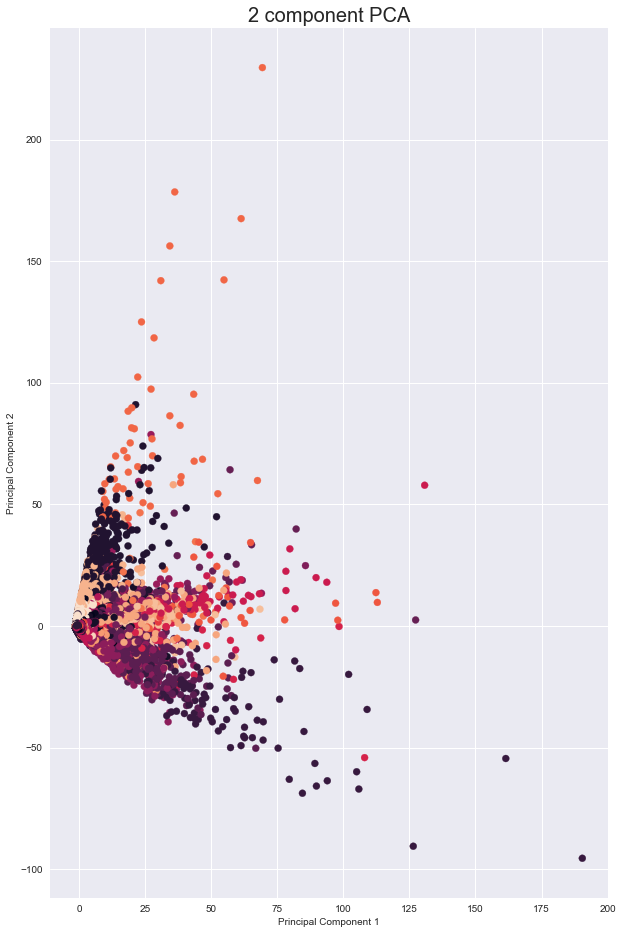

In [37]:
fig = plt.figure(figsize = (10,16))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c= y_kmeans)
plt.show()

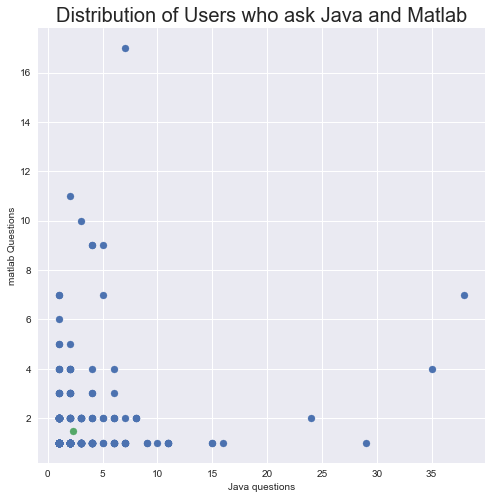

In [30]:
java_or_matlab = user_counts[(user_counts['java'] > 0) & (user_counts['matlab'] > 0) ]
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Java questions', fontsize = 10)
ax.set_ylabel('matlab Questions', fontsize = 10)
ax.set_title('Distribution of Users who ask Java and Matlab', fontsize = 20)
ax.scatter(java_or_matlab['java'], java_or_matlab['matlab'])
ax.scatter(np.mean(java_or_matlab['java']), np.mean(java_or_matlab['matlab']))
plt.show()

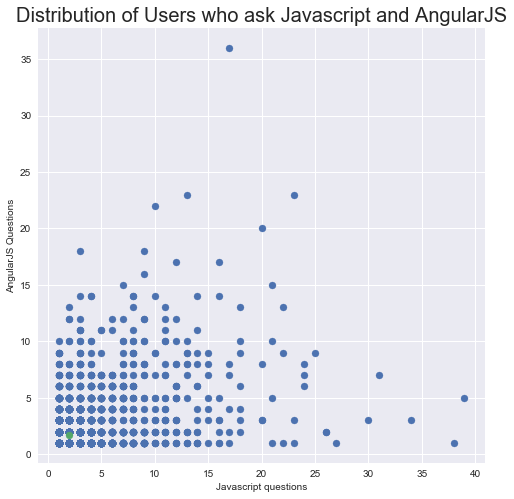

In [31]:
javascript_or_angular = user_counts[(user_counts['javascript'] > 0) & (user_counts['angularjs'] > 0)] 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Javascript questions', fontsize = 10)
ax.set_ylabel('AngularJS Questions', fontsize = 10)
ax.set_title('Distribution of Users who ask Javascript and AngularJS', fontsize = 20)
ax.scatter(javascript_or_angular['javascript'], javascript_or_angular['angularjs'])
mass = np.sum(javascript_or_angular['javascript']*javascript_or_angular['angularjs'])
ax.scatter(np.mean(javascript_or_angular['javascript']), np.mean(javascript_or_angular['angularjs']))
plt.show()

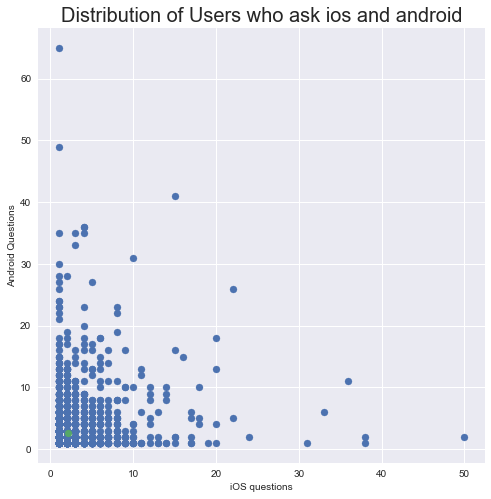

In [33]:
ios_or_android = user_counts[(user_counts['ios'] > 0) & (user_counts['android'] > 0)] 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('iOS questions', fontsize = 10)
ax.set_ylabel('Android Questions', fontsize = 10)
ax.set_title('Distribution of Users who ask ios and android', fontsize = 20)
ax.scatter(ios_or_android['ios'], ios_or_android['android'])
mass = np.sum(ios_or_android['ios']*ios_or_android['android'])
ax.scatter(np.mean(ios_or_android['ios']), np.mean(ios_or_android['android']))
plt.show()

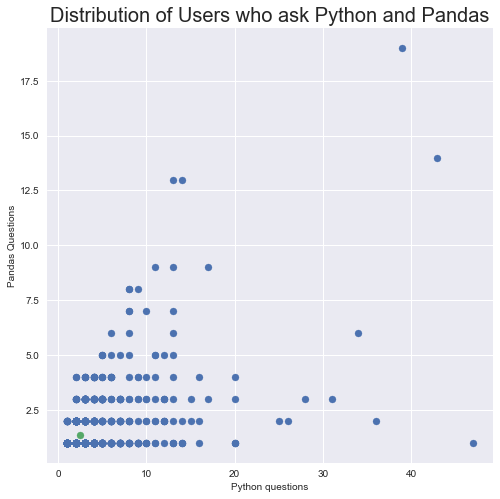

In [49]:
python_or_pandas = user_counts[(user_counts['python'] > 0) & (user_counts['pandas'] > 0)] 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Python questions', fontsize = 10)
ax.set_ylabel('Pandas Questions', fontsize = 10)
ax.set_title('Distribution of Users who ask Python and Pandas', fontsize = 20)
ax.scatter(python_or_pandas['python'], python_or_pandas['pandas'])
mass = np.sum(python_or_pandas['python']*python_or_pandas['pandas'])
ax.scatter(np.mean(python_or_pandas['python']), np.mean(python_or_pandas['pandas']))
plt.show()

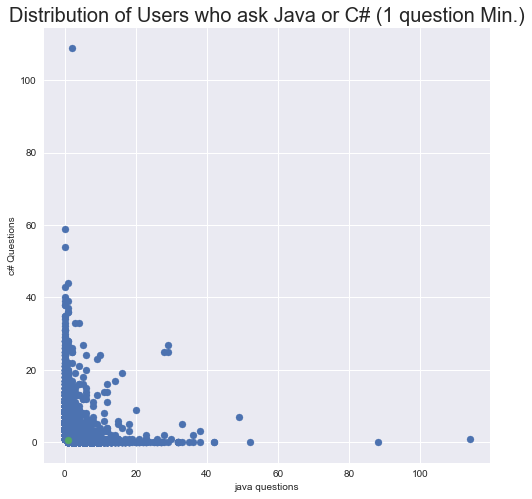

In [58]:
java_or_csharp = user_counts[(user_counts['java'] > 0) | (user_counts['c#'] > 0)] 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('java questions', fontsize = 10)
ax.set_ylabel('c# Questions', fontsize = 10)
ax.set_title('Distribution of Users who ask Java or C# (1 question Min.)', fontsize = 20)
ax.scatter(java_or_csharp['java'], java_or_csharp['c#'])
mass = np.sum(java_or_csharp['java']*java_or_csharp['c#'])
ax.scatter(np.mean(java_or_csharp['java']), np.mean(java_or_csharp['c#']))
plt.show()

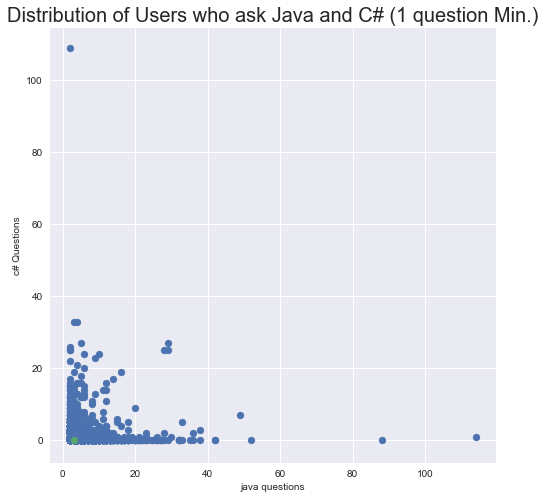

In [61]:
java_or_csharp = user_counts[(user_counts['java'] > 1) & (user_counts['java'] > 1)] 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('java questions', fontsize = 10)
ax.set_ylabel('c# Questions', fontsize = 10)
ax.set_title('Distribution of Users who ask Java and C# (1 question Min.)', fontsize = 20)
ax.scatter(java_or_csharp['java'], java_or_csharp['c#'])
mass = np.sum(java_or_csharp['java']*java_or_csharp['c#'])
ax.scatter(np.mean(java_or_csharp['java']), np.mean(java_or_csharp['c#']))
plt.show()

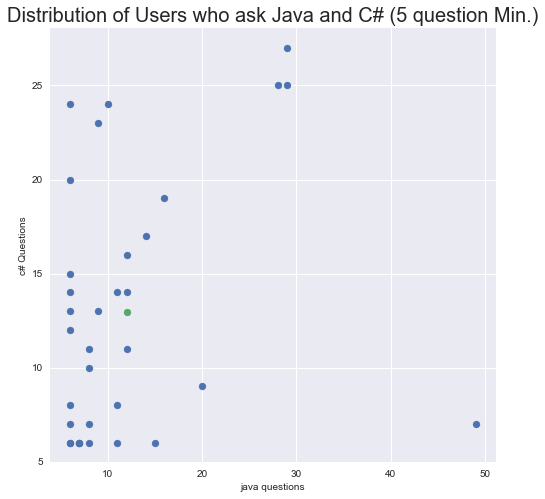

In [66]:
java_or_csharp = user_counts[(user_counts['java'] > 5) & (user_counts['c#'] > 5)] 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('java questions', fontsize = 10)
ax.set_ylabel('c# Questions', fontsize = 10)
ax.set_title('Distribution of Users who ask Java and C# (5 question Min.)', fontsize = 20)
ax.scatter(java_or_csharp['java'], java_or_csharp['c#'])
mass = np.sum(java_or_csharp['java']*java_or_csharp['c#'])
ax.scatter(np.mean(java_or_csharp['java']), np.mean(java_or_csharp['c#']))
plt.show()

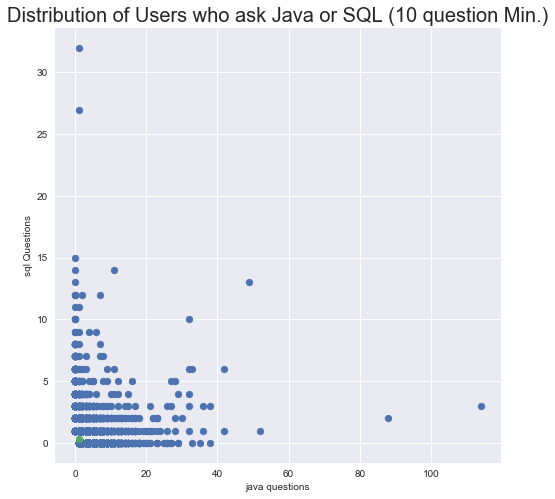

In [67]:
java_or_sql = user_counts[(user_counts['java'] > 0) | (user_counts['sql'] > 0)] 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('java questions', fontsize = 10)
ax.set_ylabel('sql Questions', fontsize = 10)
ax.set_title('Distribution of Users who ask Java or SQL (10 question Min.)', fontsize = 20)
ax.scatter(java_or_sql['java'], java_or_sql['sql'])
mass = np.sum(java_or_csharp['java']*java_or_sql['sql'])
ax.scatter(np.mean(java_or_sql['java']), np.mean(java_or_sql['sql']))
plt.show()

### PCA 2

In [ ]:
user_counts = pd.read_csv("../profiles/question_counts.csv", encoding='latin1')

In [4]:
user_questions_normalized = StandardScaler().fit_transform(user_counts.drop(["Id"],axis=1,inplace=False))

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(user_questions_normalized)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [6]:
principalDf.head()

,principal component 1,principal component 2
0,9.102529,-3.109078
1,3.341835,0.488940
2,25.782583,-24.633212
3,-0.334722,-0.143189
4,29.694484,-17.670787


In [10]:
model = KMeans(n_clusters=35)
model.fit_predict(principalDf.values[:, :]);

array([ 9, 32, 13, ..., 12, 10,  0], dtype=int32)

In [14]:
y_kmeans = model.predict(principalDf)

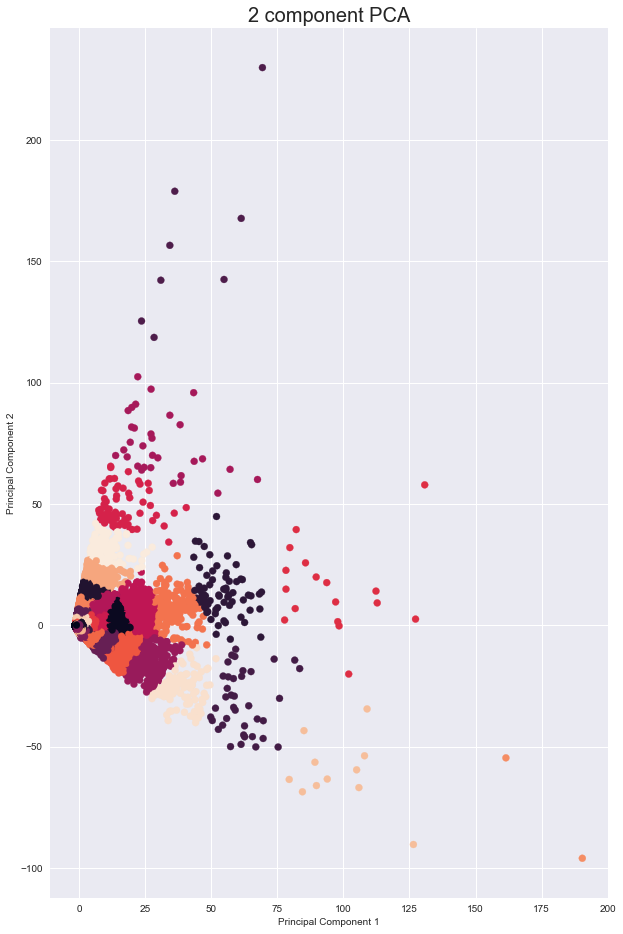

In [15]:
fig = plt.figure(figsize = (10,16))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c= y_kmeans)
plt.show()